In [2]:
%reload_ext autoreload
%autoreload 2
import torch
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import r2_score

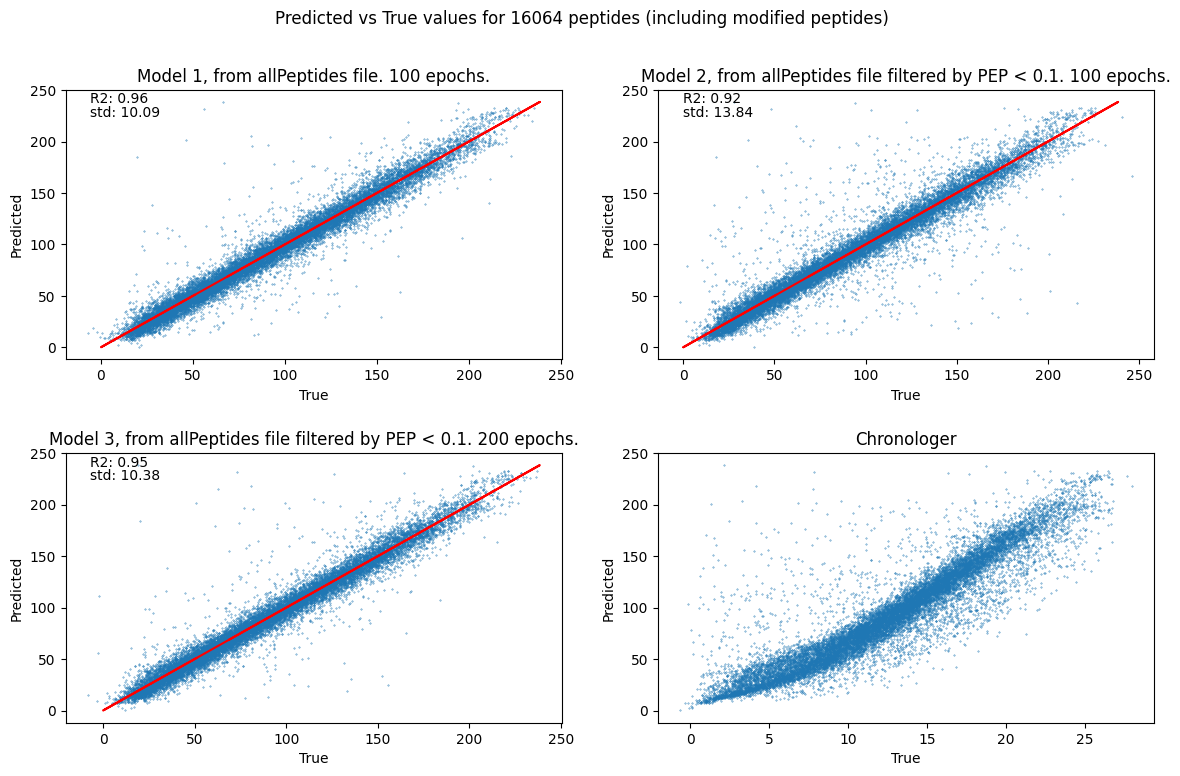

In [56]:
# weights 7thTry_model_hs_64_droput_epoch_99.pt
class TunableAttentionRegression1(torch.nn.Module):
    def __init__(self, input_size = 2707, hidden_size = 64,
                output_size = 1, numberOfHeads = 16) -> None:
        super(TunableAttentionRegression1, self).__init__()
        self.embedding = torch.nn.Embedding(input_size, 32)
        self.lstm = torch.nn.LSTM(32, hidden_size, batch_first=True)
        self.attention = torch.nn.MultiheadAttention(hidden_size, num_heads=numberOfHeads, batch_first=True) #https://pytorch.org/docs/stable/generated/torch.ao.nn.quantizable.MultiheadAttention.html#multiheadattention
        self.linear1 = torch.nn.Linear(hidden_size*200, output_size, dtype=torch.float32)
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x) -> torch.Tensor:
        # print(x.shape)
        x = x.view(x.size(0), x.size(2)*2)
        # print(x.shape)
        embedded = self.embedding(x)
        # print(embedded.shape)
        # embedded = embedded.view(*x.size(), -1) #to make it 3D
        lstm_out, _ = self.lstm(embedded)
        # print(lstm_out.shape)
        # lstm_out = lstm_out.permute(1, 0, 2)  # [seq_len, batch, hidden_size]
        # print(lstm_out.shape)
        query = lstm_out.permute(0, 1, 2)
        key = lstm_out.permute(0, 1, 2)
        value = lstm_out.permute(0, 1, 2)
        # print(query.shape, key.shape, value.shape)
        attention_output, _ = self.attention(query, key, value)
        # print(attention_output.shape)
        attention_output_as_2d = attention_output.reshape(attention_output.size(0), attention_output.size(1)*attention_output.size(2))
        # print(attention_output_as_2d.shape)
        output = self.linear1(attention_output_as_2d)
        # print(output.shape)
        # print(output)
        return output
    
# weights second_7thTry_model_hs_64_droput_epoch_99.pt
class TunableAttentionRegression2(torch.nn.Module):
    def __init__(self, input_size = 2707, hidden_size = 64,
                output_size = 1, numberOfHeads = 16) -> None:
        super(TunableAttentionRegression2, self).__init__()
        self.embedding = torch.nn.Embedding(input_size, 32)
        self.lstm = torch.nn.LSTM(32, hidden_size, batch_first=True)
        self.attention = torch.nn.MultiheadAttention(hidden_size, num_heads=numberOfHeads, batch_first=True) #https://pytorch.org/docs/stable/generated/torch.ao.nn.quantizable.MultiheadAttention.html#multiheadattention
        self.linear1 = torch.nn.Linear(hidden_size*200, output_size, dtype=torch.float32)
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x) -> torch.Tensor:
        # print(x.shape)
        x = x.view(x.size(0), x.size(2)*2)
        # print(x.shape)
        embedded = self.embedding(x)
        # print(embedded.shape)
        # embedded = embedded.view(*x.size(), -1) #to make it 3D
        lstm_out, _ = self.lstm(embedded)
        # print(lstm_out.shape)
        # lstm_out = lstm_out.permute(1, 0, 2)  # [seq_len, batch, hidden_size]
        # print(lstm_out.shape)
        query = lstm_out.permute(0, 1, 2)
        key = lstm_out.permute(0, 1, 2)
        value = lstm_out.permute(0, 1, 2)
        # print(query.shape, key.shape, value.shape)
        attention_output, _ = self.attention(query, key, value)
        # print(attention_output.shape)
        attention_output_as_2d = attention_output.reshape(attention_output.size(0), attention_output.size(1)*attention_output.size(2))
        # print(attention_output_as_2d.shape)
        output = self.linear1(attention_output_as_2d)
        # print(output.shape)
        # print(output)
        return output
    
#weights third_7thTry_model_hs_64_droput_epoch_199.pt
class TunableAttentionRegression3(torch.nn.Module):
    def __init__(self, input_size = 2707, hidden_size = 64,
                output_size = 1, numberOfHeads = 16) -> None:
        super(TunableAttentionRegression3, self).__init__()
        self.embedding = torch.nn.Embedding(input_size, 32)
        self.lstm = torch.nn.LSTM(32, hidden_size, batch_first=True)
        self.attention = torch.nn.MultiheadAttention(hidden_size, num_heads=numberOfHeads, batch_first=True) #https://pytorch.org/docs/stable/generated/torch.ao.nn.quantizable.MultiheadAttention.html#multiheadattention
        self.linear1 = torch.nn.Linear(hidden_size*200, output_size, dtype=torch.float32)
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x) -> torch.Tensor:
        # print(x.shape)
        x = x.view(x.size(0), x.size(2)*2)
        # print(x.shape)
        embedded = self.embedding(x)
        # print(embedded.shape)
        # embedded = embedded.view(*x.size(), -1) #to make it 3D
        lstm_out, _ = self.lstm(embedded)
        # print(lstm_out.shape)
        # lstm_out = lstm_out.permute(1, 0, 2)  # [seq_len, batch, hidden_size]
        # print(lstm_out.shape)
        query = lstm_out.permute(0, 1, 2)
        key = lstm_out.permute(0, 1, 2)
        value = lstm_out.permute(0, 1, 2)
        # print(query.shape, key.shape, value.shape)
        attention_output, _ = self.attention(query, key, value)
        # print(attention_output.shape)
        attention_output_as_2d = attention_output.reshape(attention_output.size(0), attention_output.size(1)*attention_output.size(2))
        # print(attention_output_as_2d.shape)
        output = self.linear1(attention_output_as_2d)
        # print(output.shape)
        # print(output)
        return output
    
class TestingTensorsDataset(torch.utils.data.Dataset):
   def __init__(self, folder):
       self.files = os.listdir(folder)
       self.folder = folder
   def __len__(self):
       return len(self.files)
   def __getitem__(self, idx):
       return torch.load(f"{self.folder}/{self.files[idx]}")
   
dataset = TestingTensorsDataset("testingTensors")
dataset[0][0].shape, dataset[0][1].shape
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_1 = TunableAttentionRegression1(hidden_size=64, numberOfHeads=8).to(device)
model_2 = TunableAttentionRegression2(hidden_size=64, numberOfHeads=8).to(device)
model_3 = TunableAttentionRegression3(hidden_size=64, numberOfHeads=8).to(device)

model_1.load_state_dict(torch.load("7thTry_model_hs_64_droput_epoch_99.pt"))
model_2.load_state_dict(torch.load("second_7thTry_model_hs_64_droput_epoch_99.pt"))
model_3.load_state_dict(torch.load("third_7thTry_model_hs_64_droput_epoch_199.pt"))

model_1.eval()
model_2.eval()
model_3.eval()
model_1_predictions = []
model_2_predictions = []
model_3_predictions = []

for i, data in enumerate(dataset):

    #model 1
    with torch.no_grad():
        inputs, labels = data

        outputs = model_1(inputs.to(device)).to(device)
        predicted = outputs
        model_1_predictions.append((labels, predicted))

    #model 2
    with torch.no_grad():
        inputs, labels = data

        outputs = model_2(inputs.to(device)).to(device)
        predicted = outputs
        model_2_predictions.append((labels, predicted))
    
    #model 3
    with torch.no_grad():
        inputs, labels = data

        outputs = model_3(inputs.to(device)).to(device)
        predicted = outputs
        model_3_predictions.append((labels, predicted))
model_1_predictions_flatten = []
model_2_predictions_flatten = []
model_3_predictions_flatten = []
real_labels = []
for label, pred in model_1_predictions:
    model_1_predictions_flatten.append(pred)
    real_labels.append(label)

for label, pred in model_2_predictions:
    model_2_predictions_flatten.append(pred)

for label, pred in model_3_predictions:
    model_3_predictions_flatten.append(pred)


model_1_predictions_flatten = torch.stack(model_1_predictions_flatten).flatten().tolist()
model_2_predictions_flatten = torch.stack(model_2_predictions_flatten).flatten().tolist()
model_3_predictions_flatten = torch.stack(model_3_predictions_flatten).flatten().tolist()
real_labels = torch.stack(real_labels).flatten()
fig, axs = plt.subplots(2, 2)

chronologer_df = pd.read_csv("out.tsv", sep="\t")
chronologer_df = chronologer_df["Pred_HI"]
chronologer_labels = pd.read_csv("out.tsv", sep="\t")
chronologer_labels = chronologer_labels["1"].tolist()


#add to suptitle sample size
fig.suptitle(f"Predicted vs True values for {len(real_labels)} peptides (including modified peptides)")
axs[0, 0].scatter(model_1_predictions_flatten, real_labels, s=0.1)
axs[0, 0].plot(real_labels, real_labels, color='red')
axs[0, 0].set_title('Model 1, from allPeptides file. 100 epochs.')
axs[0, 1].scatter(model_2_predictions_flatten, real_labels, s=0.1)
axs[0, 1].plot(real_labels, real_labels, color='red')
axs[0, 1].set_title('Model 2, from allPeptides file filtered by PEP < 0.01. 100 epochs.')
axs[1, 0].scatter(model_3_predictions_flatten, real_labels, s=0.1)
axs[1, 0].plot(real_labels, real_labels, color='red')
axs[1, 0].set_title('Model 3, from allPeptides file filtered by PEP < 0.01. 200 epochs.')
axs[1, 1].scatter(chronologer_df, chronologer_labels, s=0.1)
axs[1, 1].set_title('Chronologer')
#add r2 score to the plot
m1R2 = r2_score(real_labels, model_1_predictions_flatten)
m2R2 = r2_score(real_labels, model_2_predictions_flatten)
m3R2 = r2_score(real_labels, model_3_predictions_flatten)
# chronologerR2 = r2_score(chronologer_labels, chronologer_df)
#add scores to each corresponfing plot, upper left rounded to 2 decimal places
axs[0, 0].text(0.05, 0.95, f"R2: {m1R2:.2f}", transform=axs[0, 0].transAxes)
axs[0, 1].text(0.05, 0.95, f"R2: {m2R2:.2f}", transform=axs[0, 1].transAxes)
axs[1, 0].text(0.05, 0.95, f"R2: {m3R2:.2f}", transform=axs[1, 0].transAxes)
# axs[1, 1].text(0.05, 0.95, f"R2: {chronologerR2:.2f}", transform=axs[1, 1].transAxes)
#add standard deviation to the plot, these are list of tensors so we need to convert them to numpy arrays
m1std = torch.std(real_labels - torch.tensor(model_1_predictions_flatten)).numpy()
m2std = torch.std(real_labels - torch.tensor(model_2_predictions_flatten)).numpy()
m3std = torch.std(real_labels - torch.tensor(model_3_predictions_flatten)).numpy()
#add scores to each corresponfing plot, upper left rounded to 2 decimal places
axs[0, 0].text(0.05, 0.90, f"std: {m1std:.2f}", transform=axs[0, 0].transAxes)
axs[0, 1].text(0.05, 0.90, f"std: {m2std:.2f}", transform=axs[0, 1].transAxes)
axs[1, 0].text(0.05, 0.90, f"std: {m3std:.2f}", transform=axs[1, 0].transAxes)
#make plots bigger 
fig.set_size_inches(12, 8)
#axis for all plots
for ax in axs.flat:
    ax.set(xlabel='True', ylabel='Predicted')
#increase the space between plots
fig.tight_layout(pad=2.0)
plt.show()

#save the plot
fig.savefig("3ModelsPredictedVsTrue_with_chronologer.png")

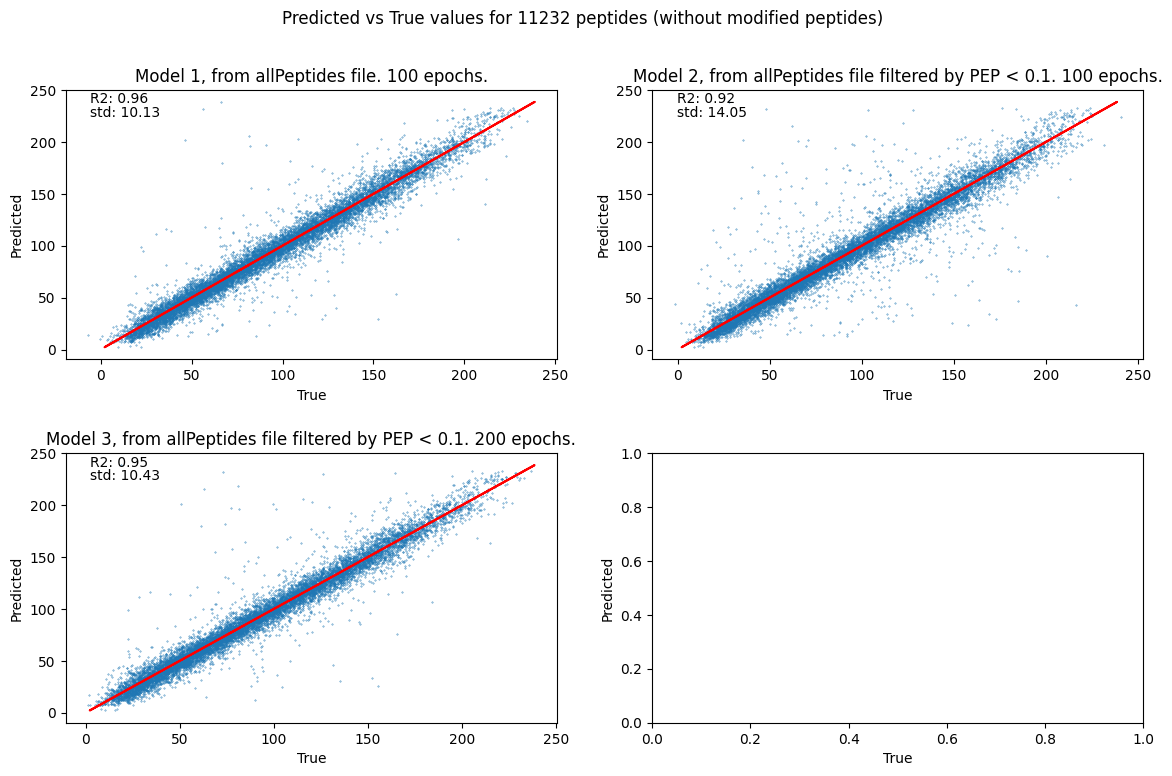

In [4]:
#now without mods
dataset = TestingTensorsDataset("testingTensorsWithoutMods")
dataset[0][0].shape, dataset[0][1].shape
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_1 = TunableAttentionRegression1(hidden_size=64, numberOfHeads=8).to(device)
model_2 = TunableAttentionRegression2(hidden_size=64, numberOfHeads=8).to(device)
model_3 = TunableAttentionRegression3(hidden_size=64, numberOfHeads=8).to(device)

model_1.load_state_dict(torch.load("7thTry_model_hs_64_droput_epoch_99.pt"))
model_2.load_state_dict(torch.load("second_7thTry_model_hs_64_droput_epoch_99.pt"))
model_3.load_state_dict(torch.load("third_7thTry_model_hs_64_droput_epoch_199.pt"))

model_1.eval()
model_2.eval()
model_3.eval()
model_1_predictions = []
model_2_predictions = []
model_3_predictions = []

for i, data in enumerate(dataset):

    #model 1
    with torch.no_grad():
        inputs, labels = data

        outputs = model_1(inputs.to(device)).to(device)
        predicted = outputs
        model_1_predictions.append((labels, predicted))

    #model 2
    with torch.no_grad():
        inputs, labels = data

        outputs = model_2(inputs.to(device)).to(device)
        predicted = outputs
        model_2_predictions.append((labels, predicted))
    
    #model 3
    with torch.no_grad():
        inputs, labels = data

        outputs = model_3(inputs.to(device)).to(device)
        predicted = outputs
        model_3_predictions.append((labels, predicted))
model_1_predictions_flatten = []
model_2_predictions_flatten = []
model_3_predictions_flatten = []
real_labels = []
for label, pred in model_1_predictions:
    model_1_predictions_flatten.append(pred)
    real_labels.append(label)

for label, pred in model_2_predictions:
    model_2_predictions_flatten.append(pred)

for label, pred in model_3_predictions:
    model_3_predictions_flatten.append(pred)


model_1_predictions_flatten = torch.stack(model_1_predictions_flatten).flatten().tolist()
model_2_predictions_flatten = torch.stack(model_2_predictions_flatten).flatten().tolist()
model_3_predictions_flatten = torch.stack(model_3_predictions_flatten).flatten().tolist()
real_labels = torch.stack(real_labels).flatten()
fig, axs = plt.subplots(2, 2)
#add to suptitle sample size
fig.suptitle(f"Predicted vs True values for {len(real_labels)} peptides (without modified peptides)")
axs[0, 0].scatter(model_1_predictions_flatten, real_labels, s=0.1)
axs[0, 0].plot(real_labels, real_labels, color='red')
axs[0, 0].set_title('Model 1, from allPeptides file. 100 epochs.')
axs[0, 1].scatter(model_2_predictions_flatten, real_labels, s=0.1)
axs[0, 1].plot(real_labels, real_labels, color='red')
axs[0, 1].set_title('Model 2, from allPeptides file filtered by PEP < 0.1. 100 epochs.')
axs[1, 0].scatter(model_3_predictions_flatten, real_labels, s=0.1)
axs[1, 0].plot(real_labels, real_labels, color='red')
axs[1, 0].set_title('Model 3, from allPeptides file filtered by PEP < 0.1. 200 epochs.')
#add r2 score to the plot
m1R2 = r2_score(real_labels, model_1_predictions_flatten)
m2R2 = r2_score(real_labels, model_2_predictions_flatten)
m3R2 = r2_score(real_labels, model_3_predictions_flatten)
#add scores to each corresponfing plot, upper left rounded to 2 decimal places
axs[0, 0].text(0.05, 0.95, f"R2: {m1R2:.2f}", transform=axs[0, 0].transAxes)
axs[0, 1].text(0.05, 0.95, f"R2: {m2R2:.2f}", transform=axs[0, 1].transAxes)
axs[1, 0].text(0.05, 0.95, f"R2: {m3R2:.2f}", transform=axs[1, 0].transAxes)
#add standard deviation to the plot, these are list of tensors so we need to convert them to numpy arrays
m1std = torch.std(real_labels - torch.tensor(model_1_predictions_flatten)).numpy()
m2std = torch.std(real_labels - torch.tensor(model_2_predictions_flatten)).numpy()
m3std = torch.std(real_labels - torch.tensor(model_3_predictions_flatten)).numpy()
#add scores to each corresponfing plot, upper left rounded to 2 decimal places
axs[0, 0].text(0.05, 0.90, f"std: {m1std:.2f}", transform=axs[0, 0].transAxes)
axs[0, 1].text(0.05, 0.90, f"std: {m2std:.2f}", transform=axs[0, 1].transAxes)
axs[1, 0].text(0.05, 0.90, f"std: {m3std:.2f}", transform=axs[1, 0].transAxes)
#make plots bigger 
fig.set_size_inches(12, 8)
#axis for all plots
for ax in axs.flat:
    ax.set(xlabel='True', ylabel='Predicted')
#increase the space between plots
fig.tight_layout(pad=2.0)
plt.show()

#save the plot
fig.savefig("3ModelsPredictedVsTrue_noMods.png")

In [46]:
%reload_ext autoreload
%autoreload 2
from src.utils import read_batched_tensor_get_chronologer_format
from src.tokenize import readVocabulary
dataset = TestingTensorsDataset("testingTensors")
vocab = readVocabulary("vocab.csv")
#convert to chronologer format
# print(vocab)
def get_swap_dict(d):
    return {v: k for k, v in d.items()}
vocab = get_swap_dict(vocab)
# print(vocab)
chronologer_format = read_batched_tensor_get_chronologer_format(dataset, vocab)
chronologer_format


[('CC[+57.021464]C[+57.021464]C[+57.021464]C[+57.021464]C[+57.021464]ER',
  69.07275),
 ('KIEEAMMDGSETPQLFTVLPEK', 110.01118666666666),
 ('NAINIEELFQGISR', 170.4624485714286),
 ('EHDQLIEK', 37.8955725),
 ('LSGENGDEVKKE', 13.70959),
 ('VEVCC[+57.021464]KDESVDLEEFR', 94.254354),
 ('GDFIHVMDNSDPNWWK', 141.08517363636363),
 ('GQVCC[+57.021464]LPVISAENWKPATK', 105.155692),
 ('HSVQCC[+57.021464]LVVDK', 27.30251),
 ('NAPVTFIVDGAVVK', 116.06905888888888),
 ('WYQMMC[+57.021464]DR', 107.91833666666666),
 ('ILMLGLDAAGK', 119.68929545454544),
 ('APPHELTEEEKQQILHSEEFLSFFDHSTR', 136.62653),
 ('QTATILSMDKDCC[+57.021464]LR', 66.34365),
 ('EYWMDPEGEMMKPGR', 66.59900272727273),
 ('LVAEPSGSESSMEQVLFPK', 123.81172),
 ('RPLGVDVQR', 36.43726),
 ('VSFLSALEEYTK', 172.70526),
 ('GCC[+57.021464]PLEAAPLPAEVR', 91.604735),
 ('ILESELEEQLSQHR', 93.95431299999998),
 ('GDIINEVVLK', 113.26576),
 ('HLEVSSASMAEDLCC[+57.021464]R', 66.58159),
 ('AGGTGLER', 37.47009),
 ('KLNEQSPTR', 20.60571857142857),
 ('ISHLVLPVQPENALK',

In [50]:
df = pd.DataFrame(chronologer_format)
df.to_csv("testingData_as_chronologer_format.tsv", index=False, sep="\t")